In [4]:
import os
import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import yfinance as yf
from MCForecastTools import MCSimulation
import pytz
%matplotlib inline

In [148]:
load_dotenv("/Users/thunguyen/Documents/Fintech/hw5/hw.env")

True

In [202]:
my_btc = 1.2
my_eth= 5.3

In [189]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

In [203]:
response_data = requests.get(btc_url)

In [191]:
print(response_data)

<Response [200]>


In [192]:
response_content = response_data.content

In [193]:
data = response_data.json()

In [204]:
 import json
print(json.dumps(data, indent=4))

{
    "1": {
        "id": 1,
        "name": "Bitcoin",
        "symbol": "BTC",
        "website_slug": "bitcoin",
        "rank": 1,
        "circulating_supply": 19250862,
        "total_supply": 19250862,
        "max_supply": 21000000,
        "quotes": {
            "USD": {
                "price": 16714.74,
                "volume_24h": 12435802855,
                "market_cap": 321820311841,
                "percentage_change_1h": -0.10950389761976,
                "percentage_change_24h": -0.0491534085818087,
                "percentage_change_7d": -1.09668464797516,
                "percent_change_1h": -0.10950389761976,
                "percent_change_24h": -0.0491534085818087,
                "percent_change_7d": -1.09668464797516
            },
            "CAD": {
                "price": 22706.97429,
                "volume_24h": 16894038178.5175,
                "market_cap": 437192893635.999,
                "percent_change_1h": -0.10950389761976,
                "pe

In [1]:
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
response_data = requests.get(eth_url)
print(response_data)

<Response [200]>


In [9]:
response_content = response_data.content
data = response_data.json()
import json
print(json.dumps(data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120525770,
            "total_supply": 120525770,
            "max_supply": 120525770,
            "quotes": {
                "USD": {
                    "price": 1215.89,
                    "volume_24h": 2880543502,
                    "market_cap": 146476458299,
                    "percentage_change_1h": 0.01797846625133,
                    "percentage_change_24h": -0.131103297059758,
                    "percentage_change_7d": -0.845358586673455,
                    "percent_change_1h": 0.01797846625133,
                    "percent_change_24h": -0.131103297059758,
                    "percent_change_7d": -0.845358586673455
                },
                "CAD": {
                    "price": 1651.786565,
                    "volume_24h": 3913218347.467,
        

In [12]:
my_agg = 200
my_spy = 50

In [14]:
import yfinance as yahooFinance
import datetime
startDate = datetime.datetime(2020, 5, 1)
endDate = datetime.datetime(2021, 5, 1)
GetAggInformation = yahooFinance.Ticker("AGG")
print(GetAggInformation.history(start=startDate,
                                     end=endDate))

                                 Open        High         Low       Close  \
Date                                                                        
2020-05-01 00:00:00-04:00  110.865463  110.988676  110.590597  110.770683   
2020-05-04 00:00:00-04:00  110.789614  110.979173  110.770661  110.865440   
2020-05-05 00:00:00-04:00  110.855970  110.865450  110.713797  110.780144   
2020-05-06 00:00:00-04:00  110.363127  110.619033  110.230434  110.334694   
2020-05-07 00:00:00-04:00  110.524234  110.675880  110.344148  110.675880   
...                               ...         ...         ...         ...   
2021-04-26 00:00:00-04:00  110.731819  110.789728  110.644966  110.644966   
2021-04-27 00:00:00-04:00  111.108186  111.108186  110.374741  110.374741   
2021-04-28 00:00:00-04:00  110.451953  110.471259  110.210687  110.432655   
2021-04-29 00:00:00-04:00  110.152772  110.374741  110.104516  110.374741   
2021-04-30 00:00:00-04:00  110.413340  110.519490  110.336133  110.490540   

In [16]:
import yfinance as yahooFinance
import datetime
startDate = datetime.datetime(2020, 5, 1)
endDate = datetime.datetime(2021, 5, 1)
GetSpyInformation = yahooFinance.Ticker("SPY")
print(GetSpyInformation.history(start=startDate,
                                     end=endDate))

                                 Open        High         Low       Close  \
Date                                                                        
2020-05-01 00:00:00-04:00  273.582144  278.712235  269.947926  271.165741   
2020-05-04 00:00:00-04:00  269.200009  272.230119  267.656203  271.913696   
2020-05-05 00:00:00-04:00  274.857509  277.360209  272.047926  274.425995   
2020-05-06 00:00:00-04:00  276.199953  276.602672  272.115053  272.565735   
2020-05-07 00:00:00-04:00  275.921866  277.868420  275.327356  275.854736   
...                               ...         ...         ...         ...   
2021-04-26 00:00:00-04:00  406.700052  407.459983  406.086256  406.865662   
2021-04-27 00:00:00-04:00  407.177409  407.382028  405.589341  406.777954   
2021-04-28 00:00:00-04:00  407.060466  408.229604  406.173875  406.661011   
2021-04-29 00:00:00-04:00  409.505884  409.895586  405.725705  409.252563   
2021-04-30 00:00:00-04:00  406.885125  407.771716  405.628306  406.563599   

In [17]:
agg_close_price = 110.7
spy_close_price = 271.16
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $110.7
Current SPY closing price: $271.16


In [6]:
monthly_income = 12000

In [7]:
saving_data = {
    "amount": [106407.569394, 37516.500000]}
tickers = ["crypto","shares"]
df_saving = pd.DataFrame(saving_data, index=tickers)
df_saving

,amount
crypto,106407.569394
shares,37516.500000


<AxesSubplot: title={'center': 'Composition of Personal Saving'}, ylabel='amount'>

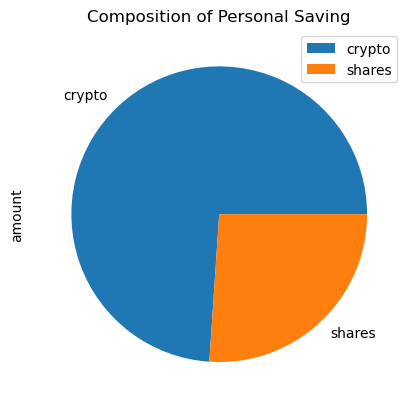

In [8]:
df_saving.plot.pie(y="amount", title="Composition of Personal Saving")

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() 
data = pdr.get_data_yahoo("AGG", start="2016-05-01", end="2021-05-01")
data = pdr.get_data_yahoo("SPY", start="2016-05-01", end="2021-05-01")
GetAggInformation = yahooFinance.Ticker("AGG")
GetSpyInformation = yahooFinance.Ticker("SPY")
print(GetAggInformation.history(start=startDate,
                                     end=endDate))
print(GetSpyInformation.history(start=startDate,
                                     end=endDate))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Date                                                                        
2016-05-02 00:00:00-04:00   94.577241   94.577241   94.389349   94.466217   
2016-05-03 00:00:00-04:00   94.705372   94.756613   94.585806   94.637047   
2016-05-04 00:00:00-04:00   94.722446   94.739524   94.594337   94.679741   
2016-05-05 00:00:00-04:00   94.731000   94.935977   94.628519   94.918892   
2016-05-06 00:00:00-04:00   94.901775   94.901775   94.773666   94.773666   
...                               ...         ...         ...         ...   
2021-04-26 00:00:00-04:00  110.731788  110.789697  110.644936  110.644936   
2021-04-27 00:00:00-04:00  111.108194  111.108194  110.374748  110.374748   
2021-04-28 00:00:00-04:00  110.451931  110.471236  110.210664  110.432632   
2021-04-29 00:0

In [130]:
agg= yf.download("AGG")
type(agg)

[*********************100%***********************]  1 of 1 completed


pandas.core.frame.DataFrame

In [131]:
spy=yf.download("SPY")
type(spy)

[*********************100%***********************]  1 of 1 completed


pandas.core.frame.DataFrame

In [20]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

In [132]:
MC_thirtyyear = MCSimulation(
    portfolio_data= pandas.core.frame.DataFrame,
    weights='[.40, .60]',
    num_simulation = 500,
    num_trading_days = 252*30
)
MC_fiveyear.portfolio_data.head()

NameError: name 'pandas' is not defined